In [1]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute, assemble, QuantumRegister, ClassicalRegister
from qiskit.tools.monitor import job_monitor
import matplotlib as mpl
# import basic plot tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
from numpy import pi

**Grover search for 2 qubit**



**i.e. Four no. list: {0,1,2,3} 
Binary Representation: {00,01,10,11}**

In [2]:
marked = ('11') # state which we want to search

n = len(marked)
gs_circuit = QuantumCircuit(n+1,n)

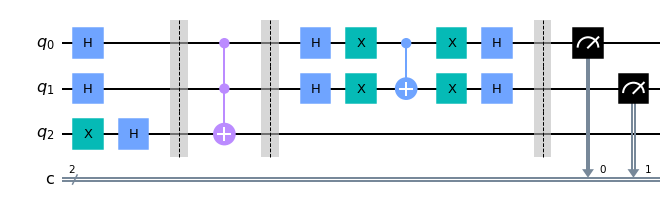

In [7]:
gs_circuit.clear()
gs_circuit.x(n)
gs_circuit.h(range(n+1)) 
gs_circuit.barrier()

# oracle operator

for i, yes in enumerate(marked):
    if yes == '0':
        gs_circuit.x(i)
        
gs_circuit.mcx(list(range(n)),n)    

for i, yes in enumerate(marked):
    if yes == '0':
        gs_circuit.x(i)  
        
gs_circuit.barrier()

# diffuser operator

gs_circuit.h(range(n))
gs_circuit.x(range(n))

gs_circuit.cx(0,1)

gs_circuit.x(range(n))
gs_circuit.h(range(n))

gs_circuit.barrier()

# measure

gs_circuit.measure(range(n),range(n))

gs_circuit.draw('mpl')

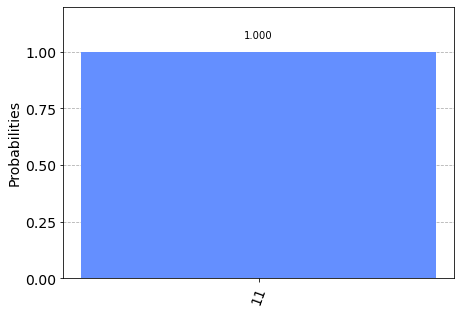

In [4]:
aer_sim = Aer.get_backend('aer_simulator')   #Local Simulator
shots = 1024                                 #No. of times the circuit is running
qobj = assemble(gs_circuit, shots = shots) 
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)                      #Plotting the result

In [5]:
# Converting the binary string to decimal

b_str = list(counts.keys())[0]
b = int(b_str,2)
print('ans:',b)

ans: 3
